# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
# load the file
df = pd.read_csv('../data/states_edu.csv')
# look at the head
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# drop the missing values
df = df.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [10]:
# choose grade 4 math as outcome variable
y = df['AVG_MATH_4_SCORE']


In [9]:
# count the years
years = df['YEAR'].unique()
print(len(years))

7


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

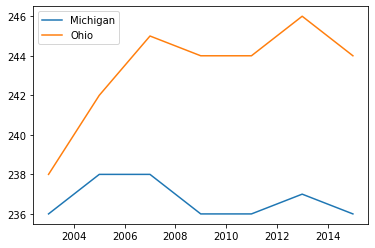

In [13]:
# average outcome score of Michigan
y_MI = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE']
# average outcome score of Ohio
y_OH = df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE']
# compare
plt.plot(years, y_MI, label='Michigan')
plt.plot(years, y_OH, label='Ohio')
plt.legend()
plt.show()

Find the average for your outcome score across all states in 2019

In [26]:
# average outcome score in 2019 for all states
y_2019 = df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()
print(y_2019)

nan


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [28]:
# maximum outcome score for Michigan
y_MI_max = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].max()
print(y_MI_max)
# maximum outcome score for Ohio
y_OH_max = df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].max()
print(y_OH_max)
# minimum outcome score for Michigan
y_MI_min = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].min()
print(y_MI_min)
# minimum outcome score for Ohio
y_OH_min = df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].min()
print(y_OH_min)

238.0
246.0
236.0
238.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# create a column for total revenue - total expenditure
df['REVENUE_MINUS_EXPENDITURE'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']
# create a column for state revenue per student
df['LOCAL_REVENUE_PER_STUDENT'] = df['LOCAL_REVENUE'] / df['GRADES_4_G']
# choose state revenue and total expenditure as predictor variable
X = df[['STATE_REVENUE_PER_STUDENT', 'TOTAL_EXPENDITURE_PER_STUDENT']]
y = df['AVG_MATH_4_SCORE']
# fill the missing values with mean
y.fillna(y.mean(), inplace=True)
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# print the coefficients
print(model.intercept_)
print(model.coef_)

231.11424445125328
[0.63394587 0.34391438]


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

In the feature engineering part, the main change that I've done is to fill y with its mean value in order to make it smoother.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='LOCAL_REVENUE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

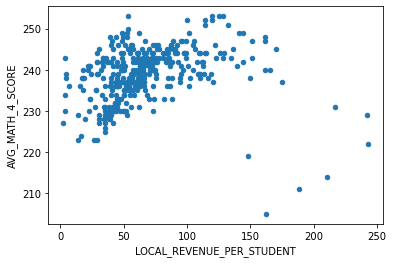

In [89]:
# first consider state revenue
df.plot.scatter(x='LOCAL_REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE')



**<CAPTION FOR VIZ 1>**

**Visualization 2**

<AxesSubplot:xlabel='REVENUE_MINUS_EXPENDITURE', ylabel='AVG_MATH_4_SCORE'>

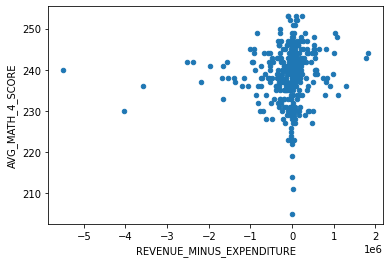

In [92]:
# then consider total revenue - total expenditure
df.plot.scatter(x='REVENUE_MINUS_EXPENDITURE', y='AVG_MATH_4_SCORE')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [94]:
X = df[['LOCAL_REVENUE_PER_STUDENT', 'REVENUE_MINUS_EXPENDITURE']]
y = df['AVG_MATH_4_SCORE']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [96]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [97]:
# create your model here
model = LinearRegression()

In [98]:
model.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [100]:
model.score(X_test, y_test)

0.07937293628123798

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

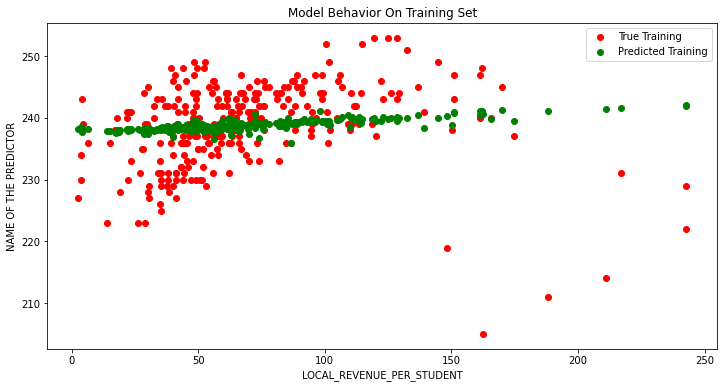

In [101]:
col_name = 'LOCAL_REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

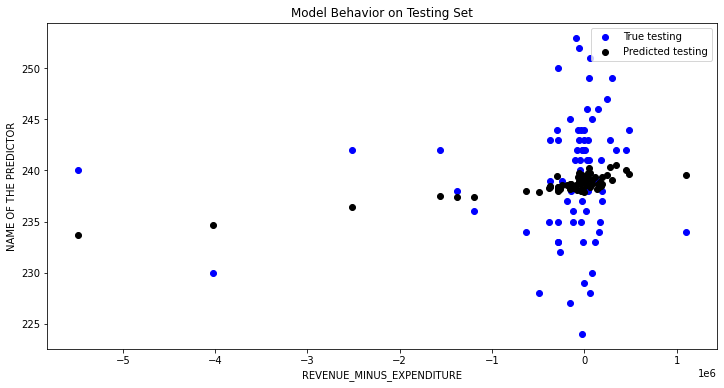

In [102]:
col_name = 'REVENUE_MINUS_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**
## Work that has been done
I mainly investigate two indicators: "local revenue oer student", and "revenue minus expenditure". 

The intuition is that if a certain state has creates more revenue per student, it's more likely that it will spend more on this student, and if this state creates more retained profits, then it'll possibly invest more in education. 

Math in primary school is not a difficult subject for students as long as people pour more efforts into it, thus I believe that more efforts can be shown by these two indicators. I suppose there will be a linear relationship.

## Findings
According to the graph that appears in the Visualization part, there seems to be a linear relation between the grade 4 math and local revenue per student, but this relationship is not clear for second indicator.

## Performance of the model
To be honest, the machine learning doesn't fit well with the testing set. 

For the first indicator, I think the reason may be that the relationship isn't strong enough to support my thought. I should find indicators that can show more about the efforts the state pours into primary school math education.

As for the second indicator, since most states' revenue and costs are mostly the same, so it's hard to indicate the relationship from a straight line.